<font color=green size=7> Data Scientist </font>                AHMETKURT

<font color=Blue size=7>  Big Data Churn prediction with Spark</font>

Big Data Churn prediction with Spark
Please use pyspark machine learning package to predict customers' behavior.

from pyspark.ml.classification import GBTClassifier 

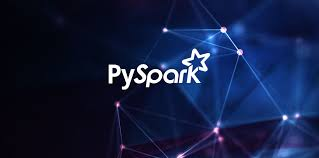

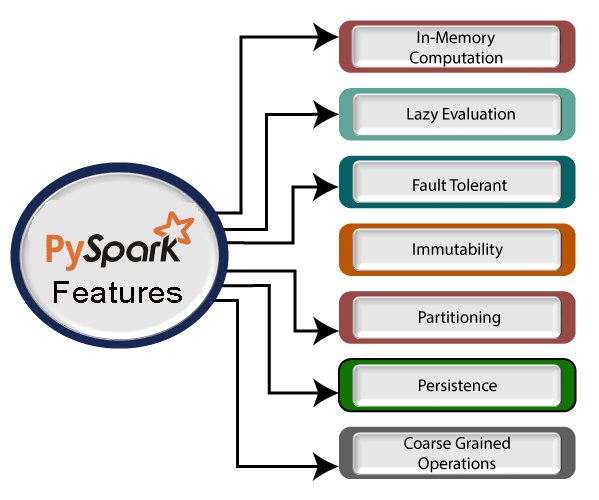

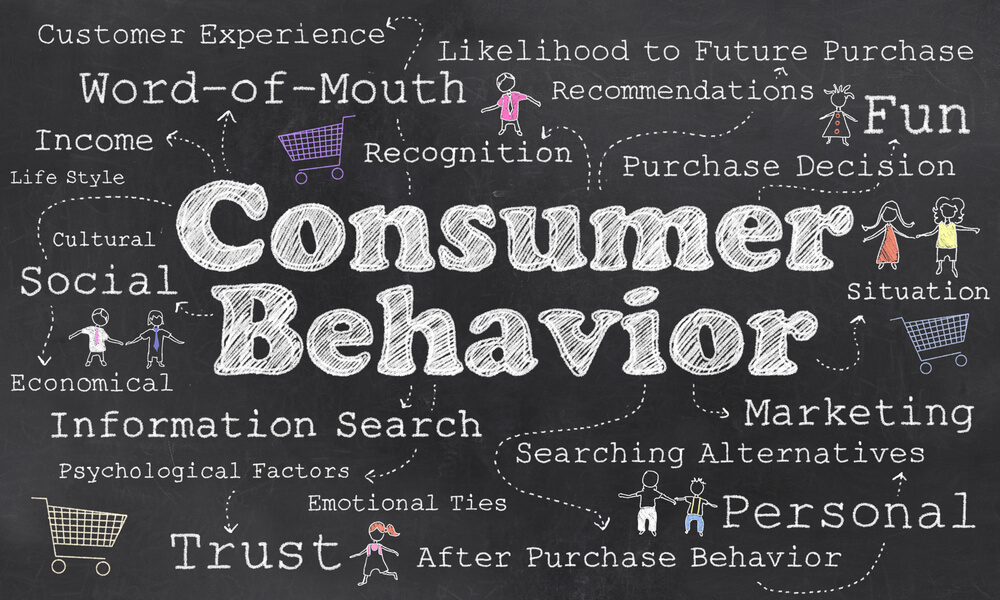

# **DOWNLOAD LIBRARIES**

In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 42 kB/s 
     |████████████████████████████████| 199 kB 53.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=7cfcd4690840a40a13e1c6842cdac2ceb55754c5dfb96a47eac400cef5080d9b
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [2]:
!pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **IMPORT LIBRARIES**

In [3]:
import pandas as pd

In [63]:
import seaborn as sns

In [4]:
from google.colab import files
uploaded=files.upload()

Saving churn.csv to churn (1).csv


In [5]:
import pandas as pd
import numpy as np

from pyspark.ml.classification import GBTClassifier
import findspark
findspark.init()
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.ml.linalg import Vectors
from pyspark.sql import SparkSession
from pyspark.sql import Row
import collections
from pyspark import SparkConf,SparkContext

# **READ DATA AND EXPLORATORY DATA ANALYSIS**

In [6]:
sprk=pd.read_csv('churn.csv')

In [7]:
sprk.head()

,Unnamed: 0,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,0,Cameron Williams,42.0,11066.80,0,7.22,8.0,1
1,1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,1
2,2,Eric Lozano,38.0,12884.75,0,6.67,12.0,1
3,3,Phillip White,42.0,8010.76,0,6.71,10.0,1
4,4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,1


In [8]:
sprk.tail()

,Unnamed: 0,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
895,895,Paul Miller,42.0,12800.82,1,3.62,8.0,0
896,896,Natalie Hodges,52.0,9893.92,0,6.91,7.0,0
897,897,Ana Smith,45.0,12056.18,0,5.46,4.0,0
898,898,Justin Leonard,51.0,6517.93,1,5.47,10.0,0
899,899,Joseph Williams,39.0,9315.60,1,5.02,10.0,0


In [9]:
sprk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       900 non-null    int64  
 1   Names            900 non-null    object 
 2   Age              900 non-null    float64
 3   Total_Purchase   900 non-null    float64
 4   Account_Manager  900 non-null    int64  
 5   Years            900 non-null    float64
 6   Num_Sites        900 non-null    float64
 7   Churn            900 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 56.4+ KB


In [10]:
sprk.isnull().sum()

Unnamed: 0         0
Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Churn              0
dtype: int64

In [11]:
sprk.describe()

,Unnamed: 0,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,449.500000,41.816667,10062.824033,0.481111,5.273156,8.587778,0.166667
std,259.951919,6.127560,2408.644532,0.499921,1.274449,1.764836,0.372885
min,0.000000,22.000000,100.000000,0.000000,1.000000,3.000000,0.000000
25%,224.750000,38.000000,8497.122500,0.000000,4.450000,7.000000,0.000000
50%,449.500000,42.000000,10045.870000,0.000000,5.215000,8.000000,0.000000
75%,674.250000,46.000000,11760.105000,1.000000,6.110000,10.000000,0.000000
max,899.000000,65.000000,18026.010000,1.000000,9.150000,14.000000,1.000000


In [12]:
sprk.shape

(900, 8)

In [13]:
sprk.sample(3)

,Unnamed: 0,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
475,475,Joshua Huff,49.0,8268.74,1,5.21,8.0,0
649,649,Cheryl Hernandez,46.0,4111.40,0,3.93,8.0,0
463,463,Jodi Thompson,35.0,11391.46,1,7.59,10.0,0


In [14]:
sprk.count()

Unnamed: 0         900
Names              900
Age                900
Total_Purchase     900
Account_Manager    900
Years              900
Num_Sites          900
Churn              900
dtype: int64

In [15]:
len(sprk.columns)

8

## DATA ***VISUALIZATIONS***

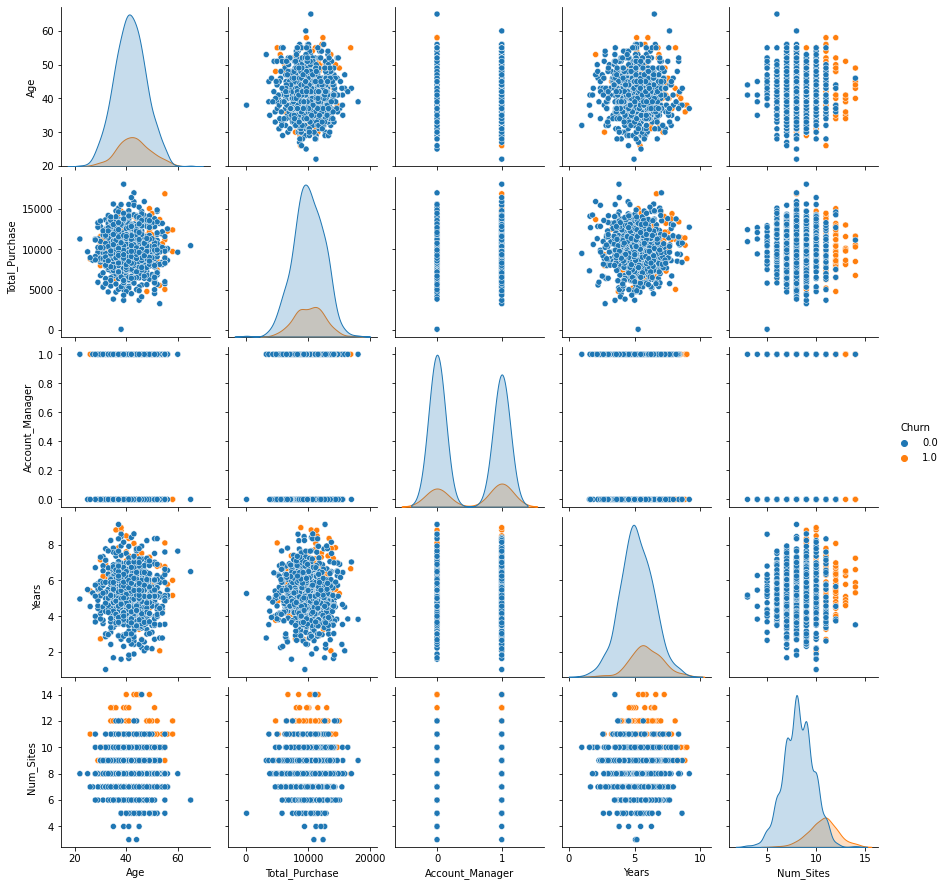

In [65]:
sns.pairplot(sprk,hue="Churn");

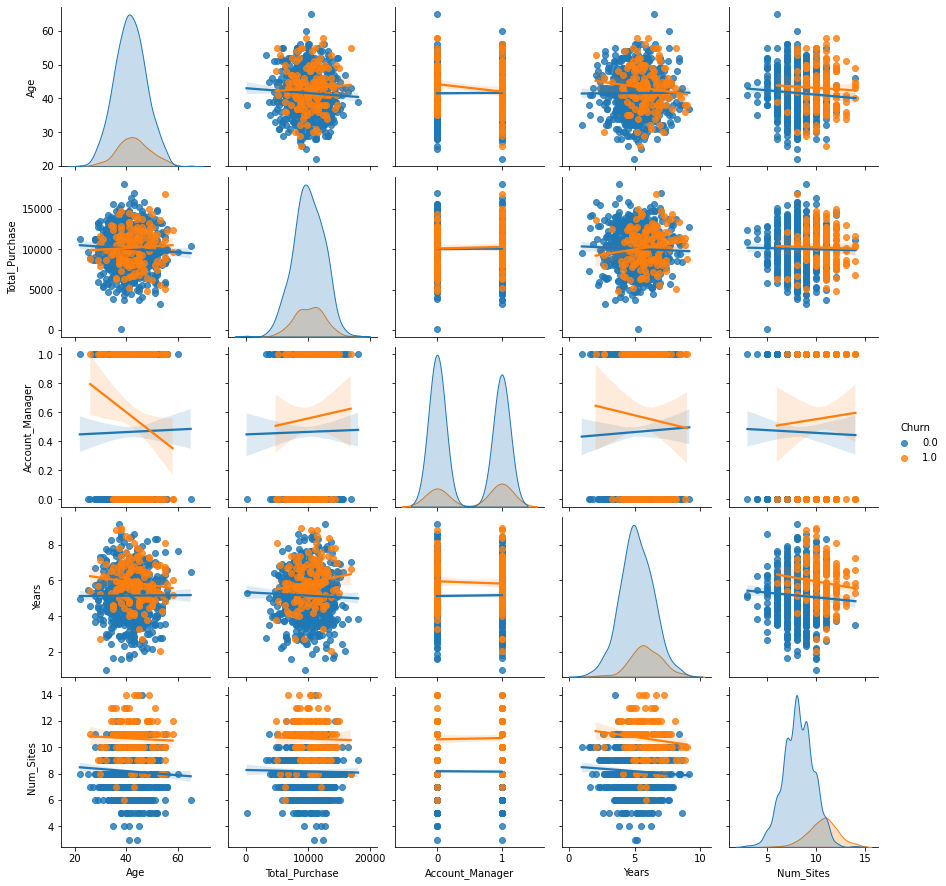

In [67]:
sns.pairplot(sprk,hue="Churn",kind="reg");

## FEATURE ***ENGINEERING***

In [16]:
sprk.drop(['Unnamed: 0','Names'],axis=1,inplace=True)

In [17]:
sprk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              900 non-null    float64
 1   Total_Purchase   900 non-null    float64
 2   Account_Manager  900 non-null    int64  
 3   Years            900 non-null    float64
 4   Num_Sites        900 non-null    float64
 5   Churn            900 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 42.3 KB


In [18]:
sprk['Age']=sprk['Age'].astype(float) 

In [19]:
sprk['Total_Purchase']=sprk['Total_Purchase'].astype(float)

In [20]:
 sprk['Account_Manager']=sprk['Account_Manager'].astype(float) 

In [21]:
 sprk['Years']=sprk['Years'].astype(float)

In [22]:
  sprk['Num_Sites']=sprk['Num_Sites'].astype(float) 

In [23]:
 sprk['Churn']=sprk['Churn'].astype(float)

In [24]:
sprk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              900 non-null    float64
 1   Total_Purchase   900 non-null    float64
 2   Account_Manager  900 non-null    float64
 3   Years            900 non-null    float64
 4   Num_Sites        900 non-null    float64
 5   Churn            900 non-null    float64
dtypes: float64(6)
memory usage: 42.3 KB


In [25]:
sprk.to_csv('churn2.csv')

In [26]:
sprk

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,42.0,11066.80,0.0,7.22,8.0,1.0
1,41.0,11916.22,0.0,6.50,11.0,1.0
2,38.0,12884.75,0.0,6.67,12.0,1.0
3,42.0,8010.76,0.0,6.71,10.0,1.0
4,37.0,9191.58,0.0,5.56,9.0,1.0
...,...,...,...,...,...,...
895,42.0,12800.82,1.0,3.62,8.0,0.0
896,52.0,9893.92,0.0,6.91,7.0,0.0
897,45.0,12056.18,0.0,5.46,4.0,0.0
898,51.0,6517.93,1.0,5.47,10.0,0.0


#  *** PYSPARK***

In [27]:
from __future__ import print_function

In [28]:
spark=SparkSession.builder.getOrCreate()

In [29]:
inputlines=df = spark.read.options(header = True, inferSchema = True).csv("churn2.csv")

In [30]:
inputlines

DataFrame[_c0: int, Age: double, Total_Purchase: double, Account_Manager: double, Years: double, Num_Sites: double, Churn: double]

In [32]:
df=inputlines.rdd.map(lambda x: x.split(","))

In [33]:
df

PythonRDD[15] at RDD at PythonRDD.scala:53

In [34]:
colnames=['Age','Total_Purchase','Account_Manager','Years','Num_Sites','Churn']

In [36]:
df1 = inputlines
df1

DataFrame[_c0: int, Age: double, Total_Purchase: double, Account_Manager: double, Years: double, Num_Sites: double, Churn: double]

In [37]:
from  pyspark.ml.feature import VectorAssembler

In [38]:
vecAssembler = VectorAssembler(inputCols=['Age','Total_Purchase','Account_Manager','Years','Num_Sites'], outputCol="features")
df1= vecAssembler.transform(df1)
df1

DataFrame[_c0: int, Age: double, Total_Purchase: double, Account_Manager: double, Years: double, Num_Sites: double, Churn: double, features: vector]

In [39]:
df1 = df1.drop("index", 'Age','Total_Purchase','Account_Manager','Years','Num_Sites')
df1

DataFrame[_c0: int, Churn: double, features: vector]

In [40]:
df1 = df1.withColumnRenamed("Churn", "label")
df1

DataFrame[_c0: int, label: double, features: vector]

In [41]:
trainTest=df1.randomSplit([0.5,0.5])
trainingDF=trainTest[0]
testDF=trainTest[1]

In [42]:
trainingDF

DataFrame[_c0: int, label: double, features: vector]

In [43]:
testDF

DataFrame[_c0: int, label: double, features: vector]

# **CLASSIFICATION**

In [44]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [45]:
gbt=GBTClassifier(featuresCol='features',maxIter=10)

In [46]:
gbt = gbt.fit(trainingDF)

In [47]:
predictions = gbt.transform(testDF)
predictions.show()

+---+-----+--------------------+--------------------+--------------------+----------+
|_c0|label|            features|       rawPrediction|         probability|prediction|
+---+-----+--------------------+--------------------+--------------------+----------+
|  3|  1.0|[42.0,8010.76,0.0...|[0.98787118843849...|[0.87822656477249...|       0.0|
|  4|  1.0|[37.0,9191.58,0.0...|[1.32967680115475...|[0.93458515967338...|       0.0|
|  5|  1.0|[48.0,10356.02,0....|[1.29797784878675...|[0.93060084124083...|       0.0|
|  7|  1.0|[32.0,9885.12,1.0...|[1.29894379755721...|[0.93072550507280...|       0.0|
|  8|  1.0|[43.0,14062.6,1.0...|[0.18195626319421...|[0.58998721532753...|       0.0|
|  9|  1.0|[40.0,8066.94,1.0...|[-1.1892285635057...|[0.08483026857762...|       1.0|
| 10|  1.0|[30.0,11575.37,1....|[1.02434473318327...|[0.88581512959519...|       0.0|
| 12|  1.0|[45.0,8988.67,1.0...|[-0.2855146198865...|[0.36099936707971...|       1.0|
| 15|  1.0|[38.0,10494.82,1....|[-1.4593271489826...|[

In [48]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)


Accuracy: 0.8577777777777778


# **PYCARET**

In [50]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 5.4 MB/s 
     |████████████████████████████████| 1.7 MB 53.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 25.9 MB 2.0 MB/s 
     |████████████████████████████████| 2.0 MB 49.9 MB/s 
     |████████████████████████████████| 636 kB 50.8 MB/s 
     |████████████████████████████████| 167 kB 73.4 MB/s 
     |████████████████████████████████| 17.0 MB 42.3 MB/s 
     |████████████████████████████████| 88 kB 7.8 MB/s 
     |████████████████████████████████| 6.8 MB 39.0 MB/s 
     |████████████████████████████████| 1.3 MB 61.2 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 134 kB 54.6 MB/s 
     |████████████████████████████████| 

In [51]:
!pip install pycaret==2.3.10 markupsafe==2.0.1 pyyaml==5.4.1 -qq

     |████████████████████████████████| 261 kB 7.3 MB/s 
     |████████████████████████████████| 3.1 MB 58.8 MB/s 
     |████████████████████████████████| 303 kB 57.5 MB/s 


In [52]:
!pip install --user pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==0.23.1

In [ ]:
from pycaret.datasets import get_data
from pycaret.classification import *